In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasithrathnayake","key":"015126b0533b3e0df4b2b995d2d02c32"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!mkdir -p data
!kaggle datasets download -d grassknoted/asl-alphabet -p data

In [0]:
!unzip data/asl-alphabet.zip -d data

In [0]:
import pathlib
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

data_dir=pathlib.Path('/content/data/asl_alphabet_train/asl_alphabet_train')

In [0]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

87000

In [0]:
#CLASS_NAMES=np.array([item.name for item in data_dir.glob('*')])
#CLASS_NAMES

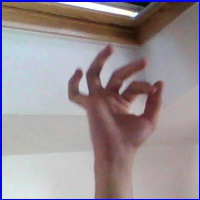

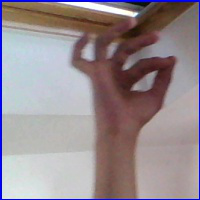

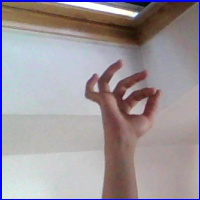

In [0]:
#F=list(data_dir.glob('F/*'))
#for image_path in F[0:3]:
  #display.display(Image.open(str(image_path)))

In [0]:
#import tensorflow as tf
#image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [0]:
#BATCH_SIZE = 32
#IMG_HEIGHT = 32
#IMG_WIDTH = 32
#STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [0]:
#train_data_gen=image_generator.flow_from_directory(directory=str(data_dir),
#                                                  batch_size=BATCH_SIZE,
#                                                  shuffle=True,
#                                                  target_size=(IMG_HEIGHT,IMG_WIDTH),
#                                                  classes=list(CLASS_NAMES))

Found 87000 images belonging to 29 classes.


In [0]:
#def show_batch(image_batch,label_batch):
#  plt.figure(figsize=(10,10))
#  for n in range(25):
#    ax=plt.subplot(5,5,n+1)
#    plt.imshow(image_batch[n])
#    plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
#    plt.axis('off')        

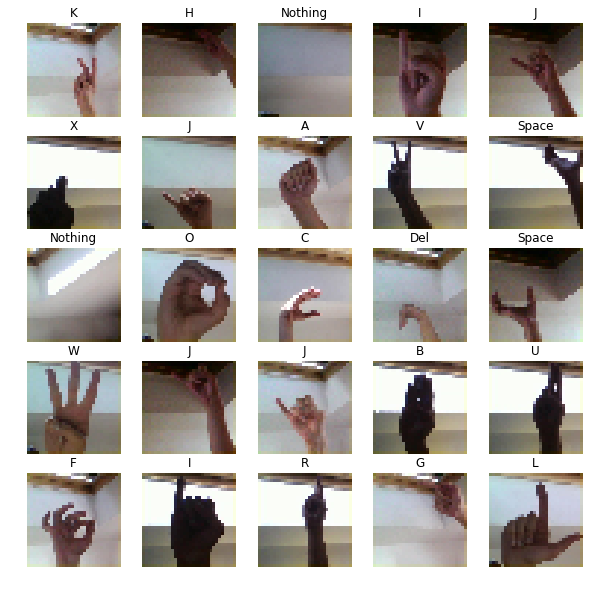

In [0]:
#image_batch,label_batch=next(train_data_gen)
#show_batch(image_batch,label_batch)

In [0]:
IMG_SIZE=80
import numpy as np#array operations
import matplotlib.pyplot as plt #show images
import os #iterate dir and show paths
import cv2#image operations

DATADIR="/content/data/asl_alphabet_train/asl_alphabet_train" #where image sets are
CATEGORIES = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z","del","nothing","space"]
#categories

training_data = []

def create_training_data():
  for letters in CATEGORIES:
    path=os.path.join(DATADIR,letters)#path to our examples directory
    class_num= CATEGORIES.index(letters)#indexting the categories to 0,1,2,3,4....
    for images in os.listdir(path):#loop through all the images
      try:
        img_array=cv2.imread(os.path.join(path,images))
        res_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))#basically array resizing using cv2
        #convert to array using imread then convert to grayscale
        training_data.append([res_array,class_num])#append the resized array and class number index to training data list
      except Exception as e:
        pass
create_training_data()#creates our training dataset from the function

In [0]:
import random
random.shuffle(training_data)

In [0]:
X=[]#empty list for x feature set
y=[]#labels indexes

for features, label in training_data:#running over 2 dimentions of the training data list
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [0]:
import pickle #this is for saving our dataset 

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [0]:
X=X/255

NameError: ignored

In [0]:
import time
from tensorflow.keras.callbacks import TensorBoard
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

dense_layers=[1]
layer_sizes=[64]
conv_layers=[2]

for dense_layer in dense_layers:
  for layer_size in layer_sizes:
    for conv_layer in conv_layers:
      NAME="{}-conv-{}-nodes-{}-dense{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
      tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
      print(NAME)

      model = models.Sequential()
      model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 3)))
      model.add(layers.MaxPooling2D((2, 2)))
      
      for l in range(conv_layer-1):
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
      
      model.add(layers.Flatten())
      for l in range(dense_layer):
        model.add(layers.Dense(layer_size,activation='relu'))
        
        
        
      model.add(layers.Flatten())
      model.add(layers.Dense(29, activation='softmax'))

      model.summary()
      
      model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
      history=model.fit(X,y,batch_size=100,epochs=10,validation_split=0.2,callbacks=[tensorboard]) 
h             


2-conv-64-nodes-1-dense1571785303
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1327168   
_______

KeyboardInterrupt: ignored

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-10-22 18:54:25--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.214.163.243, 3.221.209.32, 3.224.23.57, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.214.163.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.13M  17.4MB/s    in 0.8s    

2019-10-22 18:54:26 (17.4 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')


In [0]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://c909e0b0.ngrok.io
